In [1]:
import geopandas as gpd
import pandas as pd

work_path = r'../../../'
quetzal_path = work_path + r'quetzal_santo_domingo/model/'

import sys
sys.path.insert(0, '../../../quetzal/')

from quetzal.model import stepmodel
from quetzal.io import display

SQLalchemy is not installed. No support for SQL output.


In [2]:
sm = stepmodel.read_zip(quetzal_path + r'ref_18/pt_pathfinder.zip')

zones: 100%|███████████████████████████████████████████████████████████████████████████| 26/26 [00:20<00:00,  1.25it/s]


In [3]:
%matplotlib inline

In [4]:
projected = sm.change_epsg(epsg=4326, coordinates_unit='degree')

Reprojecting model from epsg 32619 to epsg 4326: 100%|█████████████████████████████████| 34/34 [00:01<00:00, 19.71it/s]


In [5]:
sm.links['color'] = sm.links['route_color'].apply(lambda c : ('#' + c).replace('##', '#'))
sm.links.loc[sm.links['route_type']=='concho', 'color'] = 'red'
sm.links.loc[sm.links['route_type']=='minibus', 'color'] = 'orange'
sm.links.loc[sm.links['route_type']=='gondola', 'color'] = 'green'
sm.links.loc[sm.links['route_type']=='subway', 'color'] = 'blue'
sm.links.loc[sm.links['route_type']=='streetcar', 'color'] = 'purple'

In [6]:
lines = sm.links['route_id'].to_dict()
sm.pt_los['routes'] = [str([lines[l] for l in bl])[1:-1] for bl in sm.pt_los['boarding_links']]

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:07<00:00,  1.05it/s]


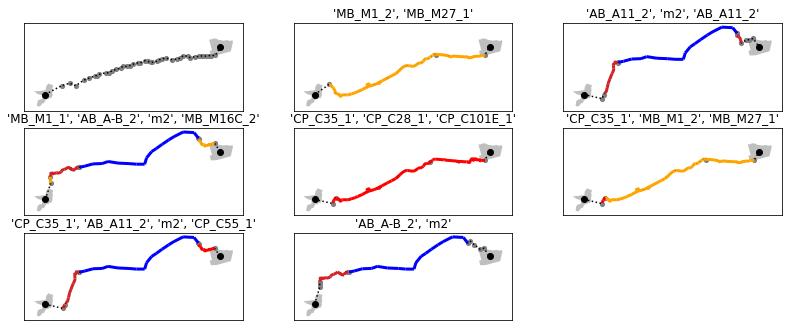

In [7]:
plot = sm.plot_separated_paths('zone_117',  'zone_83', rows=3, figsize=[20, 10], resize=True, title='routes')